In [1]:
import numpy as np
import matplotlib.pyplot as pl
from matplotlib.offsetbox import AnchoredText

## NNI

In [2]:
result = np.loadtxt('./results/SNR_test_ALL.dat')
reshaped = np.reshape(result, (len(result)//4, 4))
[snr_tot, snr_221, BF, BF_nofilter] = reshaped.T

In [3]:
np.polyfit(np.log10(snr_221[1:]), np.log10(BF[1:]), deg=1, cov=True)

(array([ 1.7588061 , -1.11918039]),
 array([[ 0.0006421 , -0.00123873],
        [-0.00123873,  0.00274491]]))

Text(0, 0.5, 'BF: 220+221 - nofilter')

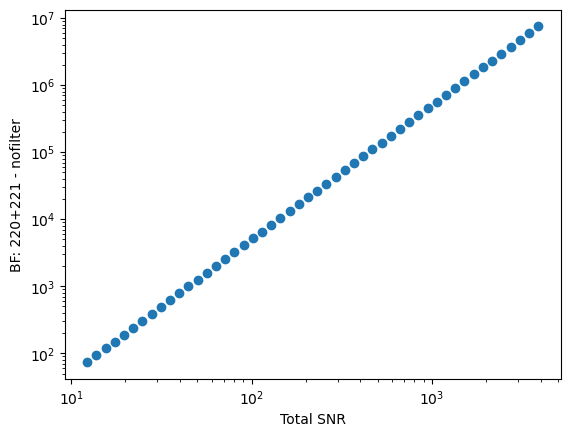

In [4]:
pl.loglog(snr_tot, BF_nofilter, 'o')
pl.xlabel("Total SNR")
pl.ylabel("BF: 220+221 - nofilter")

In [18]:
idx = snr_tot > 100
np.polyfit(np.log10(snr_tot[idx]), np.log10(BF_nofilter[idx]), deg=1, cov=True)

(array([ 2.00017561, -0.30167686]),
 array([[ 5.09932846e-10, -1.42674749e-09],
        [-1.42674749e-09,  4.10507526e-09]]))

In [16]:
idx = snr_tot < 100
np.polyfit(np.log10(snr_tot[idx]), np.log10(BF_nofilter[idx]), deg=1, cov=True)

(array([ 2.01033583, -0.32021289]),
 array([[ 1.08749741e-06, -1.65560857e-06],
        [-1.65560857e-06,  2.59669923e-06]]))

Text(0, 0.5, 'BF: 220 : nofilter')

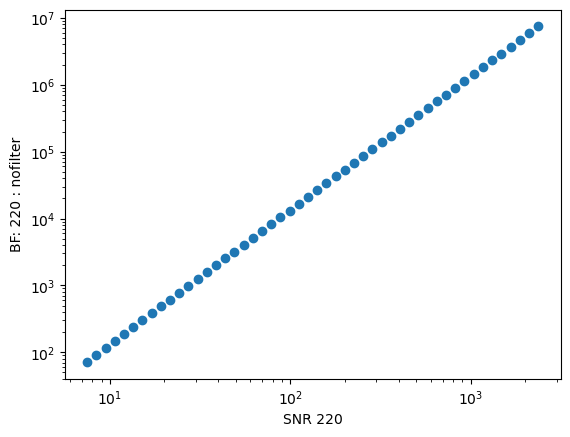

In [7]:
snr220 = snr_tot - snr_221
BF220 = BF_nofilter - BF

pl.loglog(snr220, BF220, 'o')
pl.xlabel("SNR 220")
pl.ylabel("BF: 220 : nofilter")

In [20]:
idx = snr220 > 100
np.polyfit(np.log10(snr220[idx]), np.log10(BF220[idx]), deg=1, cov=True)

(array([2.00015185, 0.12516489]),
 array([[ 4.41981985e-10, -1.19814619e-09],
        [-1.19814619e-09,  3.31779073e-09]]))

In [19]:
idx = snr220 < 100
np.polyfit(np.log10(snr220[idx]), np.log10(BF220[idx]), deg=1, cov=True)

(array([2.01774195, 0.0940138 ]),
 array([[ 3.84883462e-06, -5.52437968e-06],
        [-5.52437968e-06,  8.37018225e-06]]))

In [11]:
np.polyfit(np.log10(snr_tot), np.log10(BF_nofilter), deg=1, cov=True)

(array([ 2.00231163, -0.30777695]),
 array([[ 1.05316165e-07, -2.46305953e-07],
        [-2.46305953e-07,  6.33133868e-07]]))

In [14]:
idx = (snr_tot - snr220)<11
np.polyfit(np.log10(snr_tot - snr220), np.log10(BF_nofilter - BF220), deg=1, cov=True)

(array([ 1.75869051, -1.12141374]),
 array([[ 0.00064007, -0.00123515],
        [-0.00123515,  0.00273045]]))

Text(0, 0.5, 'BF: 221 : nofilter')

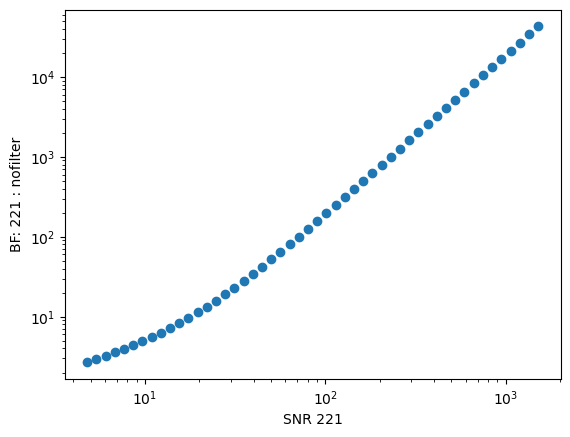

In [15]:
pl.loglog(snr_tot - snr220, BF_nofilter - BF220, 'o')
pl.xlabel("SNR 221")
pl.ylabel("BF: 221 : nofilter")

Text(0, 0.5, 'BF: 2 modes : 1 mode')

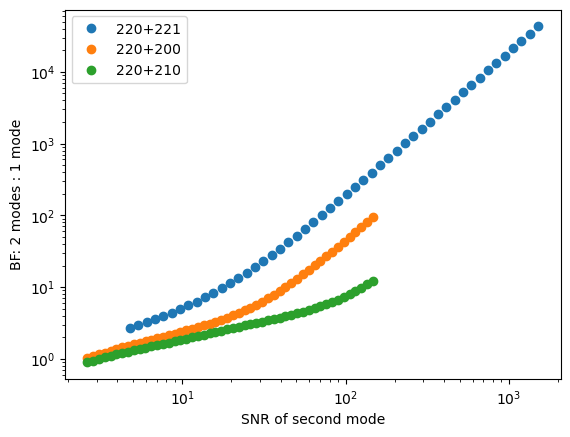

In [11]:
result = np.loadtxt('./results/SNR_test_ALL.dat')
reshaped = np.reshape(result, (len(result)//4, 4))
[snr_tot, snr_221, BF, BF_nofilter] = reshaped.T
pl.loglog(snr_221, BF, 'o', label = "220+221")

result = np.loadtxt('./results/220+200_NNI_ALL.dat')
reshaped = np.reshape(result, (len(result)//4, 4))
[snr_tot, snr_200, BF, BF_nofilter] = reshaped.T
pl.loglog(snr_200, BF, 'o', label = "220+200")

result = np.loadtxt('./results/220+210_NNI_ALL.dat')
reshaped = np.reshape(result, (len(result)//4, 4))
[snr_tot, snr_210, BF, BF_nofilter] = reshaped.T
pl.loglog(snr_210, BF, 'o', label = "220+210")
pl.legend()
pl.xlabel("SNR of second mode")
pl.ylabel("BF: 2 modes : 1 mode")

In [54]:
np.polyfit(np.log10(snr_221[:-1]), np.log10(BF[:-1]), deg=1, cov=True)

(array([ 1.78812877, -1.18463565]),
 array([[ 0.00055545, -0.00109959],
        [-0.00109959,  0.00248132]]))

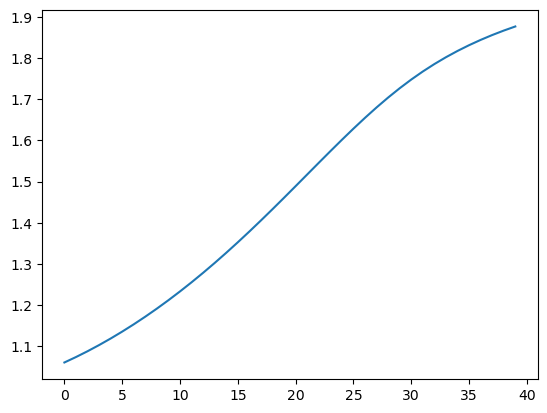

In [10]:
slope_arr = []
sort_idx = np.argsort(snr_200)
log_snr = np.log10(snr_200[sort_idx])
log_BF = np.log10(BF[sort_idx])

for i in range(40):
    slope, _ = np.polyfit(log_snr[i:], log_BF[i:], deg=1, cov=False)
    slope_arr.append(slope)
    
pl.plot(slope_arr)

## Colored noise

## 1 mode

In [9]:
result = np.loadtxt('./results/1mode_injected_ALL.dat')
reshaped = np.reshape(result, (len(result)//4, 4))
[snr, nofilter, evidence220, evidence220_221] = reshaped.T

In [10]:
len(snr)

200

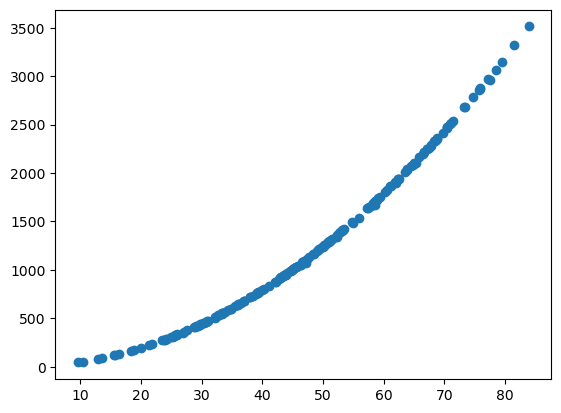

In [11]:
pl.plot(snr, evidence220_221-nofilter, 'o')

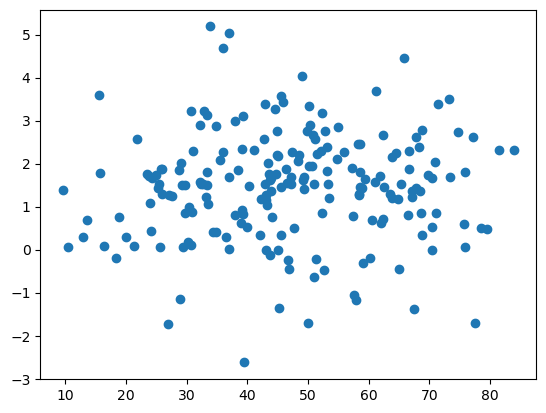

In [12]:
pl.plot(snr, evidence220_221-evidence220, 'o')

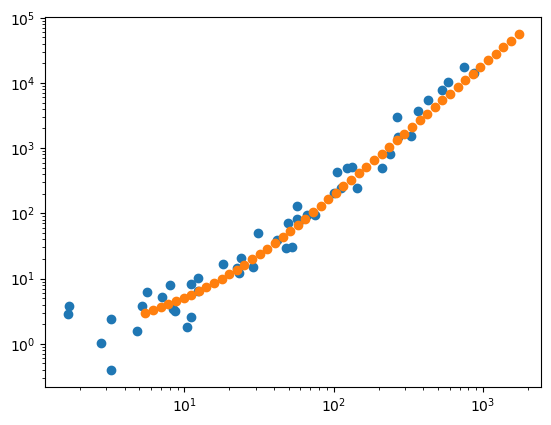

In [66]:
result = np.loadtxt('./results/2modes_injection_system_ALL.dat')
reshaped = np.reshape(result, (len(result)//4, 4))
[snr_tot, snr_221, BF, BF_nofilter] = reshaped.T
pl.loglog(snr_221, BF, 'o', label='Injected 2 modes, recover 2 modes')

result = np.loadtxt('./results/SNR_test_large_window_ALL.dat')
reshaped = np.reshape(result, (len(result)//4, 4))
[snr_tot, snr_221, BF, BF_nofilter] = reshaped.T
pl.loglog(snr_221, BF, 'o', label='Injected 2 modes, recover 2 modes')


Text(0, 0.5, 'BF: 220+221 - nofilter')

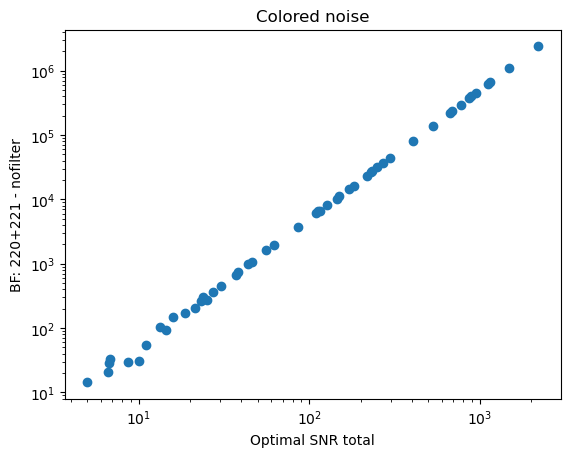

In [69]:
result = np.loadtxt('./results/2modes_injection_system_ALL.dat')
reshaped = np.reshape(result, (len(result)//4, 4))
[snr_tot, snr_221, BF, BF_nofilter] = reshaped.T
pl.loglog(snr_tot, BF_nofilter, 'o', label='Injected 2 modes, recover 2 modes')
pl.title("Colored noise")
pl.xlabel("Optimal SNR total")
pl.ylabel("BF: 220+221 - nofilter")

## On same plot

Text(0, 0.5, 'Bayes factor')

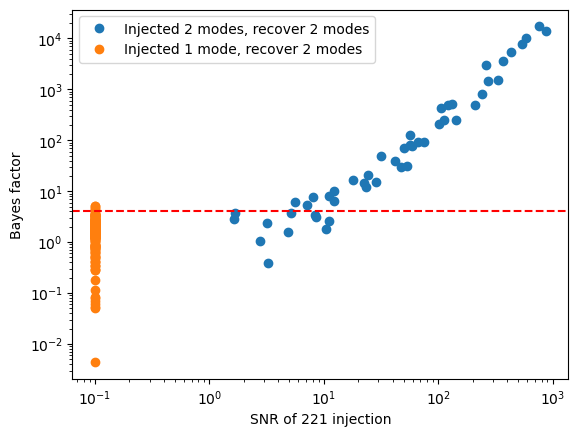

In [61]:
result = np.loadtxt('./results/2modes_injection_system_ALL.dat')
reshaped = np.reshape(result, (len(result)//4, 4))
[snr_tot, snr_221, BF, BF_nofilter] = reshaped.T
pl.loglog(snr_221, BF, 'o', label='Injected 2 modes, recover 2 modes')
result = np.loadtxt('./results/1mode_injected_ALL.dat')
reshaped = np.reshape(result, (len(result)//4, 4))
[snr, nofilter, evidence220, evidence220_221] = reshaped.T
pl.loglog(0.1+0*snr, evidence220_221-evidence220, 'o', label='Injected 1 mode, recover 2 modes')
pl.axhline(np.median(evidence220_221-evidence220)+2*np.std(evidence220_221-evidence220), c='r', ls='--')


pl.legend()
pl.xlabel("SNR of 221 injection")
pl.ylabel("Bayes factor")

In [17]:
print("BF threshold = %.2f" % (np.median(evidence220_221-evidence220)+3*np.std(evidence220_221-evidence220)))

BF threshold = 5.30


Text(0, 0.5, 'Bayes factor')

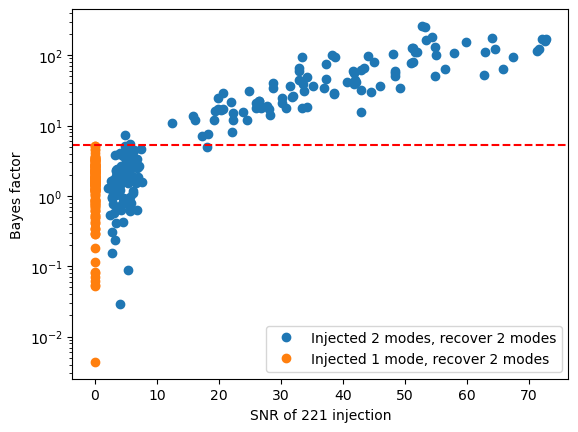

In [18]:
result = np.loadtxt('./results/optimal_2modes_injected_ALL.dat')
reshaped = np.reshape(result, (len(result)//6, 6))
[snr_tot, snr_220, snr_221, nofilter, evidence220, evidence220_221] = reshaped.T
pl.semilogy(snr_221, evidence220_221 - evidence220, 'o', label='Injected 2 modes, recover 2 modes')
result = np.loadtxt('./results/1mode_injected_ALL.dat')
reshaped = np.reshape(result, (len(result)//4, 4))
[snr, nofilter, evidence220, evidence220_221] = reshaped.T
pl.semilogy(0*snr, evidence220_221-evidence220, 'o', label='Injected 1 mode, recover 2 modes')
pl.axhline(np.median(evidence220_221-evidence220)+3*np.std(evidence220_221-evidence220), c='r', ls='--')


pl.legend()
pl.xlabel("SNR of 221 injection")
pl.ylabel("Bayes factor")

## 1 mode injected

In [5]:
result = np.loadtxt('./results/1mode_injected_ALL.dat')
reshaped = np.reshape(result, (len(result)//6, 6))
[snr, nofilter, evidence220, evidence220_221, evidence220_210, evidence220_200] = reshaped.T

Text(0, 0.5, 'lg(BF)')

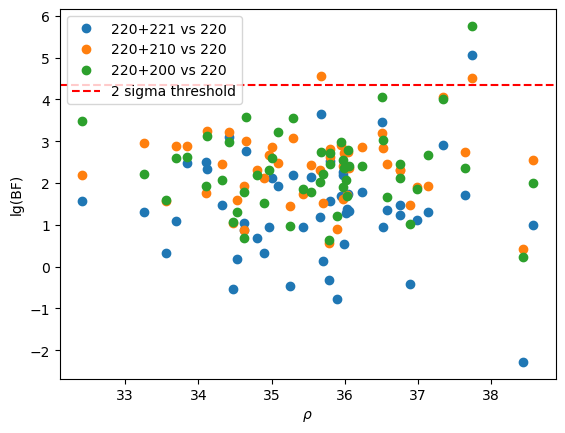

In [6]:
# without normalising for SNR
concat = np.array([evidence220_221-evidence220, evidence220_210-evidence220, evidence220_200-evidence220]).flatten()
threshold = np.median(concat)+2*np.std(concat)

pl.plot(snr, evidence220_221 - evidence220, 'o', label = '220+221 vs 220')
pl.plot(snr, evidence220_210 - evidence220, 'o', label = '220+210 vs 220')
pl.plot(snr, evidence220_200 - evidence220, 'o', label = '220+200 vs 220')
pl.axhline(np.median(concat)+2*np.std(concat), c='r', ls='--', label='2 sigma threshold')
pl.legend()
pl.xlabel(r'$\rho$')
pl.ylabel("lg(BF)")

(array([ 1.,  0.,  0.,  0.,  3.,  2.,  2.,  3.,  6., 11.,  7.,  3.,  6.,
         3.,  2.,  1.,  1.,  0.,  0.,  1.]),
 array([-2.2821107 , -1.91519732, -1.54828394, -1.18137056, -0.81445718,
        -0.4475438 , -0.08063042,  0.28628296,  0.65319634,  1.02010972,
         1.3870231 ,  1.75393649,  2.12084987,  2.48776325,  2.85467663,
         3.22159001,  3.58850339,  3.95541677,  4.32233015,  4.68924353,
         5.05615691]),
 <BarContainer object of 20 artists>)

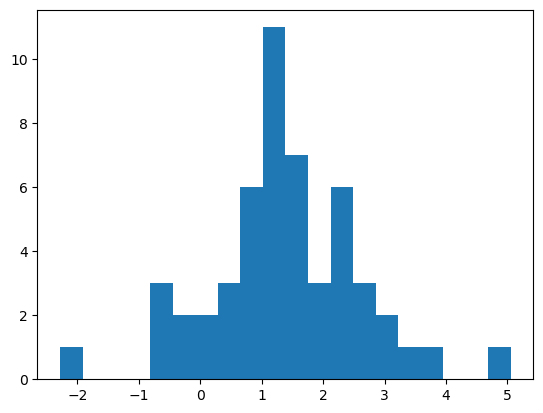

In [7]:
pl.hist(evidence220_221 - evidence220, bins=20)

In [8]:
result = np.loadtxt('./results/2mode_injected_ALL.dat')
reshaped = np.reshape(result, (len(result)//8, 8))
[snr_tot, snr_220, snr_221, nofilter, evidence220_2mode, evidence220_221_2mode, evidence220_210_2mode, evidence220_200_2mode] = reshaped.T

In [20]:
snr_tot

array([48.70743531, 47.48114558, 47.88624222, 50.74925482, 49.60795214,
       49.20985979, 48.22783712, 49.22544118, 51.0203163 , 49.03349867,
       47.73877756, 47.65412063, 50.50406187, 47.88804406, 49.31674287,
       50.60850221, 49.61450797, 47.81573546, 48.70528234, 50.6428446 ,
       48.85451317, 49.6762011 , 49.81187549, 50.5513669 , 46.34532365,
       48.00845832, 49.67502201, 50.79971608, 50.28985062, 48.15012417,
       48.75922584, 48.63483768, 47.43030072, 49.77020562, 49.6331638 ,
       47.34081138, 47.72429672, 48.28516999, 51.09515442, 51.74464341,
       49.66689078, 46.34335504])

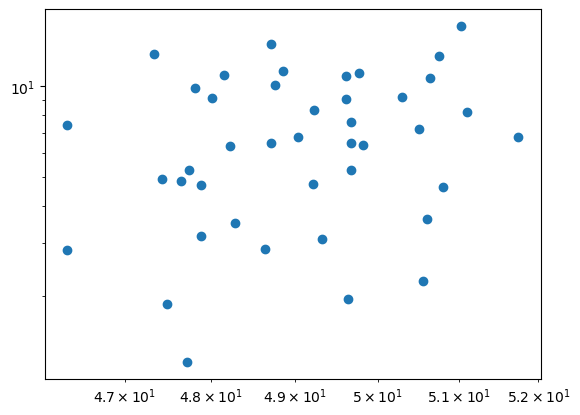

In [18]:
pl.loglog(snr_tot, evidence220_221_2mode - evidence220_2mode, 'o')

In [13]:
np.sqrt(snr_220[0]**2 + snr_221[0]**2)

66.01846021267056

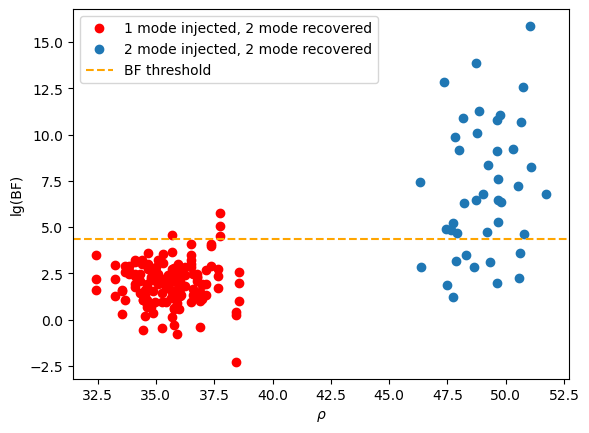

In [10]:
pl.plot(snr, evidence220_221 - evidence220, 'o', c='r', label = '1 mode injected, 2 mode recovered')
pl.plot(snr, evidence220_210 - evidence220, 'o', c='r')
pl.plot(snr, evidence220_200 - evidence220, 'o', c='r')
pl.xlabel(r'$\rho$')
pl.ylabel("lg(BF)")

pl.plot(snr_tot, evidence220_221_2mode - evidence220_2mode, 'o', label = '2 mode injected, 2 mode recovered')
pl.axhline(threshold, c='orange', ls='--', label='BF threshold')
pl.legend()

In [48]:
injected_2modes = evidence220_221_2mode - evidence220_2mode
a =  np.count_nonzero(injected_2modes > threshold)/len(injected_2modes)
b = 1-a
c = np.count_nonzero(concat > threshold)/len(concat)
d = 1-c
MCC = (a*d-b*c)/np.sqrt((a+b)*(c+d)*(a+c)*(b+d))

[a, b, c, d] = np.round([a, b, c, d], 2)

In [49]:
Latex(f"""\\begin{{equation*}}
\\begin{{bmatrix}}{a} & {b} \\\\{c} & {d}\\end{{bmatrix}}
\\end{{equation*}}
""")

<IPython.core.display.Latex object>

In [50]:
print("Matthews correlation coefficient = %.2f" % MCC)

Matthews correlation coefficient = 0.75


In [51]:
print("Mode is detectable if there exists a BF threshold s.t. the MCC is > 0.75?")
print("For given 2nd mode SNR, 1st mode SNR")

Mode is detectable if there exists a BF threshold s.t. the MCC is > 0.75?
